In [4]:
import torch

In [5]:
x_train = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]) # XOR 규칙
y_train = torch.FloatTensor([[0], [1], [1], [0]])

In [6]:
x_train

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [7]:
y_train

tensor([[0.],
        [1.],
        [1.],
        [0.]])

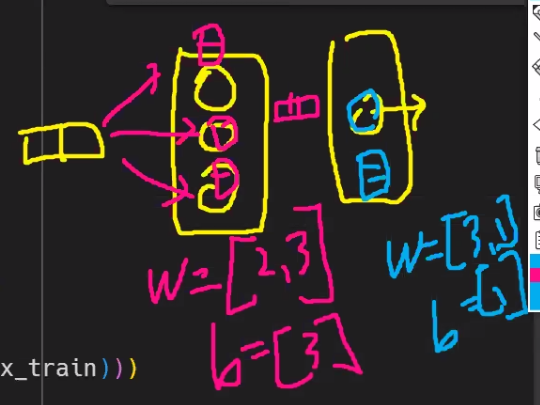

In [14]:
W_h = torch.randn([2, 3], requires_grad=True) # 생성되는 텐서의 기울기를 계산
b_h = torch.randn([3], requires_grad=True)
W_o = torch.randn([3, 1], requires_grad=True)
b_o = torch.randn([1], requires_grad=True)

In [15]:
optimizer = torch.optim.SGD([W_h, W_o, b_h, b_o], lr=0.01) # 확률적 경사 하강법 이용해 W와 b 학습하겠다고 명시

In [17]:
# 딥러닝 1단계: 모델 만들기
def H(x):
    HL1 = torch.sigmoid(torch.matmul(x, W_h) + b_h)
    return torch.sigmoid(torch.matmul(HL1, W_o) + b_o)

In [18]:
# 딥러닝 2단계: 학습 (W와 b값 구하는 과정)
for step in range(200000):
    cost = -torch.mean(y_train*torch.log(H(x_train)) + (1-y_train)*torch.log(1-H(x_train)))
    optimizer.zero_grad() # 이전 단계에서 계산된 기울기 초기화
    cost.backward() # 오차(cost)를 이용해 역전파 수행
    optimizer.step() # optimizer 이용해 W와 b 업데이트

In [19]:
# 딥러닝 3단계: 추론/테스트
x_test = torch.FloatTensor(x_train)
print(H(x_train).detach()) # .detach(): grad_fn 제거하고 출력하기 위함

tensor([[0.0070],
        [0.9950],
        [0.9950],
        [0.0048]])
